# Exploring Relationships

## This script contains the following points:

### 01. Importing Libraries and Loading Files
### 02. Correlation Matrix and Heatmap
### 03. Scatterplot
### 04. Pair Plots
### 05. Categorical Plots
### 06. Hypothesis

### 01. Importing Libraries and Loading Files

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Creating path variable
path = r'C:\Users\widne\Documents\CareerFoundry Exercises\Data_Immersion\Achievement 6\06-2024 International Football Matches'

# Loading cleaned csv files
df_results = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'results_cleaned.csv'), index_col=False)
df_goalscorers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'goalscorers_cleaned.csv'), index_col=False)
df_shootouts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shootouts_cleaned.csv'), index_col=False)
df_team_results = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'team_results.csv'), index_col=False)

In [2]:
# Dropping Unnamed: 0 columns
df_results = df_results.drop(['Unnamed: 0'], axis=1)
df_goalscorers = df_goalscorers.drop(['Unnamed: 0'], axis = 1)
df_shootouts = df_shootouts.drop(['Unnamed: 0'], axis = 1)
df_team_results = df_team_results.drop(['Unnamed: 0'], axis = 1)

In [3]:
# Checking dataframes
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,goal_diff,scoring_type,winning_team,losing_team
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,United Kindgom,False,1872,11,0.0,0.0,Low scoring,draw,draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,United Kingdom,False,1873,3,6.0,2.0,High scoring,England,Scotland
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,United Kindgom,False,1874,3,3.0,1.0,Medium scoring,Scotland,England
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,United Kingdom,False,1875,3,4.0,0.0,Medium scoring,draw,draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,United Kindgom,False,1876,3,3.0,3.0,Medium scoring,Scotland,England


In [4]:
df_results.describe()

,home_score,away_score,year,month,total_goals,goal_diff
count,47075.000000,47075.000000,47075.000000,47075.000000,47075.000000,47075.000000
mean,1.761190,1.183452,1992.392969,6.864557,2.944642,1.717663
std,1.776751,1.402597,24.998067,3.242682,2.099795,1.795123
min,0.000000,0.000000,1872.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1979.000000,4.000000,1.000000,1.000000
50%,1.000000,1.000000,1999.000000,7.000000,3.000000,1.000000
75%,2.000000,2.000000,2011.000000,10.000000,4.000000,2.000000
max,31.000000,21.000000,2024.000000,12.000000,31.000000,31.000000


In [11]:
df_goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [12]:
df_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,Unknown
1,1971-11-14,South Korea,Vietnam Republic,South Korea,Unknown
2,1972-05-07,South Korea,Iraq,Iraq,Unknown
3,1972-05-17,Thailand,South Korea,South Korea,Unknown
4,1972-05-19,Thailand,Cambodia,Thailand,Unknown


In [13]:
df_team_results.head()

,team,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,...,friendly_goals_against,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference
0,Abkhazia,11.0,3.0,14.0,3.0,2.0,5.0,8.0,5.0,13.0,...,6.0,1.000000,-2.0,-0.333333,47.0,1.807692,20.0,0.769231,27.0,1.038462
1,Afghanistan,18.0,17.0,35.0,17.0,52.0,69.0,10.0,21.0,31.0,...,49.0,1.484848,-20.0,-0.606061,109.0,1.068627,228.0,2.235294,-119.0,-1.166667
2,Albania,73.0,27.0,100.0,78.0,115.0,193.0,46.0,34.0,80.0,...,140.0,1.228070,-5.0,-0.043860,216.0,0.833977,425.0,1.640927,-209.0,-0.806950
3,Alderney,1.0,4.0,5.0,46.0,82.0,128.0,1.0,1.0,2.0,...,12.0,4.000000,-9.0,-3.000000,70.0,0.530303,608.0,4.606061,-538.0,-4.075758
4,Algeria,191.0,73.0,264.0,60.0,103.0,163.0,82.0,75.0,157.0,...,239.0,1.057522,58.0,0.256637,581.0,1.622905,354.0,0.988827,227.0,0.634078


### 02. Correlation Matrix and Heatmap

In [7]:
# Converting date column to datetime type
df_results['date'] = pd.to_datetime(df_results['date'])

In [9]:
# Adding year and month columns to df_results dataframe
df_results['year'] = df_results['date'].dt.year
df_results['month'] = df_results['date'].dt.month

In [10]:
# Checking dataframe
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,3


In [11]:
# Creating total_goals column for df_results
df_results['total_goals'] = df_results['home_score'] + df_results['away_score']

In [12]:
# Checking dataframe
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,11,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,3,6.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,3,3.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,3,4.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,3,3.0


In [13]:
# Creating goal_diff column for df_results
df_results['goal_diff'] = abs(df_results['home_score'] - df_results['away_score'])

In [14]:
# Checking dataframe
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,total_goals,goal_diff
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,11,0.0,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,3,6.0,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,3,3.0,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,3,4.0,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,3,3.0,3.0


In [15]:
df_results.dtypes

date           datetime64[ns]
home_team              object
away_team              object
home_score            float64
away_score            float64
tournament             object
city                   object
country                object
neutral                  bool
year                    int32
month                   int32
total_goals           float64
goal_diff             float64
dtype: object

In [17]:
# Creating dataframe that only includes numerical columns of df_results
df_results_numericals = df_results.select_dtypes(include=['int','float'])
df_results_numericals.head()

,home_score,away_score,year,month,total_goals,goal_diff
0,0.0,0.0,1872,11,0.0,0.0
1,4.0,2.0,1873,3,6.0,2.0
2,2.0,1.0,1874,3,3.0,1.0
3,2.0,2.0,1875,3,4.0,0.0
4,3.0,0.0,1876,3,3.0,3.0


In [18]:
# Creating correlation matrix
df_results_numericals.corr()

,home_score,away_score,year,month,total_goals,goal_diff
home_score,1.000000,-0.143453,-0.124272,0.018890,0.750333,0.645143
away_score,-0.143453,1.000000,-0.119314,0.007588,0.546586,0.233549
year,-0.124272,-0.119314,1.000000,0.048447,-0.184852,-0.078212
month,0.018890,0.007588,0.048447,1.000000,0.021053,0.019943
total_goals,0.750333,0.546586,-0.184852,0.021053,1.000000,0.701894
goal_diff,0.645143,0.233549,-0.078212,0.019943,0.701894,1.000000


Text(0.5, 1.0, 'Results Correlation Matrix')

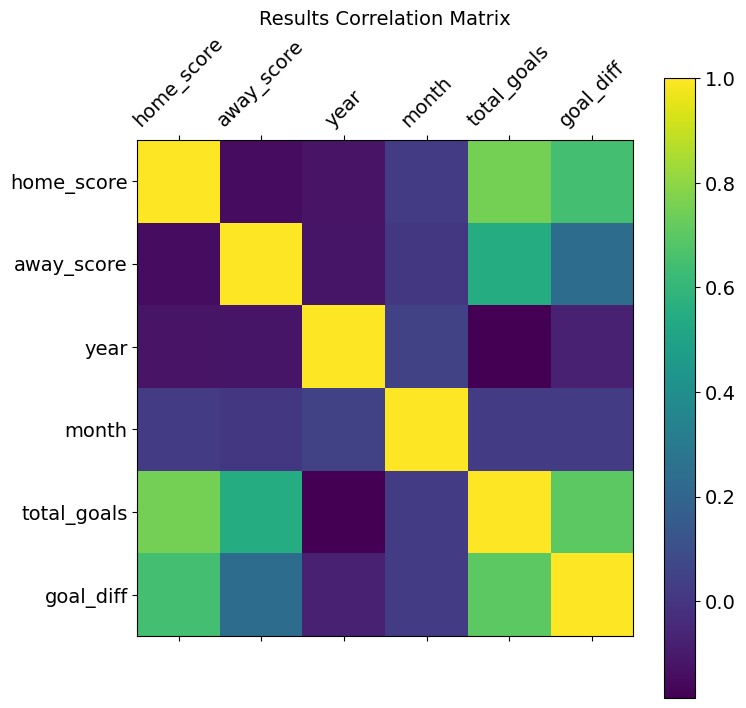

In [21]:
# Creating correlation matrix for df_results
f = plt.figure(figsize=(8,8)) # Size of figure
plt.matshow(df_results_numericals.corr(), fignum=f.number) # Type of plot
plt.xticks(range(df_results_numericals.shape[1]), df_results_numericals.columns, fontsize=14, rotation=45) # x-axis labels
plt.yticks(range(df_results_numericals.shape[1]), df_results_numericals.columns, fontsize=14) # y-axis labels
cb = plt.colorbar() # Color legend
cb.ax.tick_params(labelsize=14) # Setting font size
plt.title('Results Correlation Matrix', fontsize=14) # Creating title

For this correlation matrix, the lighter the color the stronger the positive relationship is between two variables. Conversely, the darker the color the stronger the negative relationship is between two variables.

In [22]:
# Creating subset excluding 'year' and 'month' columns
sub = df_results_numericals[['home_score', 'away_score', 'total_goals', 'goal_diff']]

In [23]:
sub

,home_score,away_score,total_goals,goal_diff
0,0.0,0.0,0.0,0.0
1,4.0,2.0,6.0,2.0
2,2.0,1.0,3.0,1.0
3,2.0,2.0,4.0,0.0
4,3.0,0.0,3.0,3.0
...,...,...,...,...
47070,0.0,1.0,1.0,1.0
47071,1.0,0.0,1.0,1.0
47072,2.0,0.0,2.0,2.0
47073,3.0,3.0,6.0,0.0


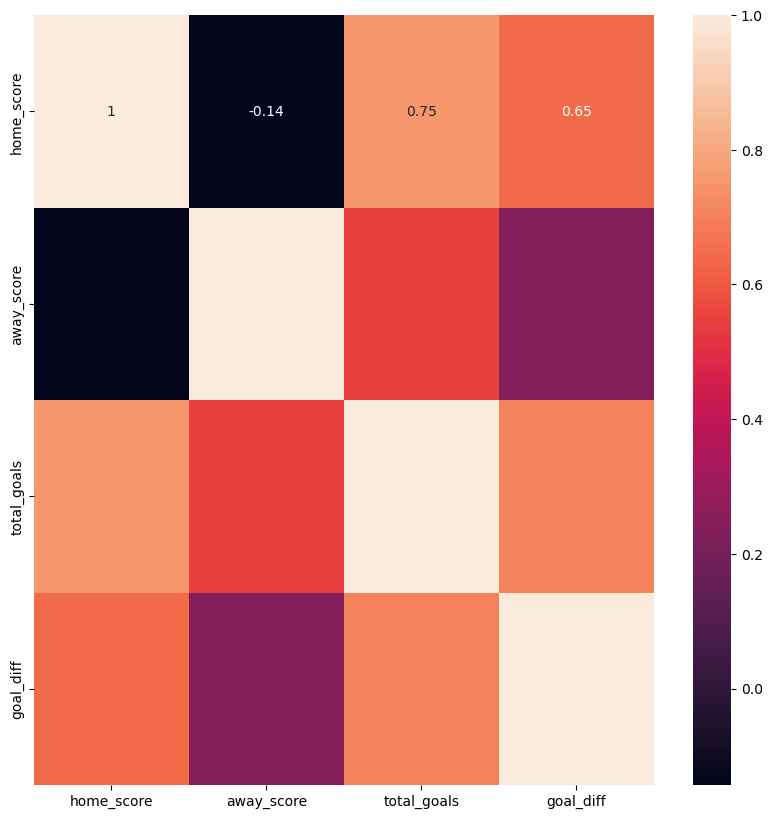

In [26]:
# Creating subplot
f,ax = plt.subplots(figsize=(10,10))

# Creating correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot=True, ax=ax)

In the heat map, the lighter the color the stronger the positive relationship is between two variables. Conversely the darker the color the stronger the negative relationship is between two variables.

I do not know why the heatmap is only showing the correlation values for the first row only.

In [15]:
# Creating dataframe that contains numericals of df_team_results
df_team_results_numericals = df_team_results.select_dtypes(include=['int', 'float'])
df_team_results_numericals.head()

,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,home_games_played,...,friendly_goals_against,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference
0,11.0,3.0,14.0,3.0,2.0,5.0,8.0,5.0,13.0,22.0,...,6.0,1.000000,-2.0,-0.333333,47.0,1.807692,20.0,0.769231,27.0,1.038462
1,18.0,17.0,35.0,17.0,52.0,69.0,10.0,21.0,31.0,45.0,...,49.0,1.484848,-20.0,-0.606061,109.0,1.068627,228.0,2.235294,-119.0,-1.166667
2,73.0,27.0,100.0,78.0,115.0,193.0,46.0,34.0,80.0,197.0,...,140.0,1.228070,-5.0,-0.043860,216.0,0.833977,425.0,1.640927,-209.0,-0.806950
3,1.0,4.0,5.0,46.0,82.0,128.0,1.0,1.0,2.0,48.0,...,12.0,4.000000,-9.0,-3.000000,70.0,0.530303,608.0,4.606061,-538.0,-4.075758
4,191.0,73.0,264.0,60.0,103.0,163.0,82.0,75.0,157.0,333.0,...,239.0,1.057522,58.0,0.256637,581.0,1.622905,354.0,0.988827,227.0,0.634078


In [16]:
df_team_results_numericals.corr()

,home_wins,away_wins,total_wins,home_losses,away_losses,total_losses,home_draws,away_draws,total_draws,home_games_played,...,friendly_goals_against,average_friendly_goals_against,friendly_goal_difference,friendly_average_goal_difference,tournament_goals_for,average_tournament_goals_for,tournament_goals_against,average_tournament_goals_against,tournament_goal_difference,average_tournament_goal_difference
home_wins,1.000000,0.937634,0.991182,0.711784,0.753079,0.755348,0.936528,0.907614,0.940495,0.970346,...,0.842178,-0.122849,0.550828,0.160463,0.958801,0.332429,0.654931,-0.288517,0.654966,0.356972
away_wins,0.937634,1.000000,0.975428,0.640402,0.728081,0.711443,0.874789,0.911041,0.911441,0.902109,...,0.842637,-0.120251,0.593982,0.163865,0.931077,0.349362,0.602520,-0.279936,0.673017,0.354527
total_wins,0.991182,0.975428,1.000000,0.695220,0.754813,0.749908,0.927000,0.922493,0.943485,0.958847,...,0.854947,-0.123696,0.575514,0.164159,0.962572,0.343855,0.644748,-0.289560,0.671641,0.361379
home_losses,0.711784,0.640402,0.695220,1.000000,0.899662,0.961392,0.825514,0.718427,0.786511,0.854684,...,0.809679,-0.006928,-0.022655,0.000923,0.718448,0.105757,0.900257,-0.194715,0.038259,0.204779
away_losses,0.753079,0.728081,0.754813,0.899662,1.000000,0.985069,0.856301,0.848922,0.869854,0.859541,...,0.847920,-0.026255,0.031615,0.017759,0.764122,0.124098,0.908526,-0.223493,0.094798,0.235870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
average_tournament_goals_for,0.332429,0.349362,0.343855,0.105757,0.124098,0.119922,0.228421,0.248230,0.243379,0.269556,...,0.226277,-0.214982,0.255427,0.225426,0.394430,1.000000,0.079534,-0.225571,0.479276,0.504597
tournament_goals_against,0.654931,0.602520,0.644748,0.900257,0.908526,0.927647,0.743806,0.695281,0.733644,0.777624,...,0.659465,0.025500,0.003896,-0.040687,0.720202,0.079534,1.000000,-0.098671,-0.069439,0.111676
average_tournament_goals_against,-0.288517,-0.279936,-0.289560,-0.194715,-0.223493,-0.217651,-0.296495,-0.295249,-0.301869,-0.283359,...,-0.252214,0.020385,-0.114624,-0.119154,-0.283361,-0.225571,-0.098671,1.000000,-0.298418,-0.954926
tournament_goal_difference,0.654966,0.673017,0.671641,0.038259,0.094798,0.074838,0.467024,0.502719,0.495102,0.491295,...,0.386526,-0.182373,0.684187,0.243165,0.642080,0.479276,-0.069439,-0.298418,1.000000,0.410491


Text(0.5, 1.0, 'Team Results Correlation Matrix')

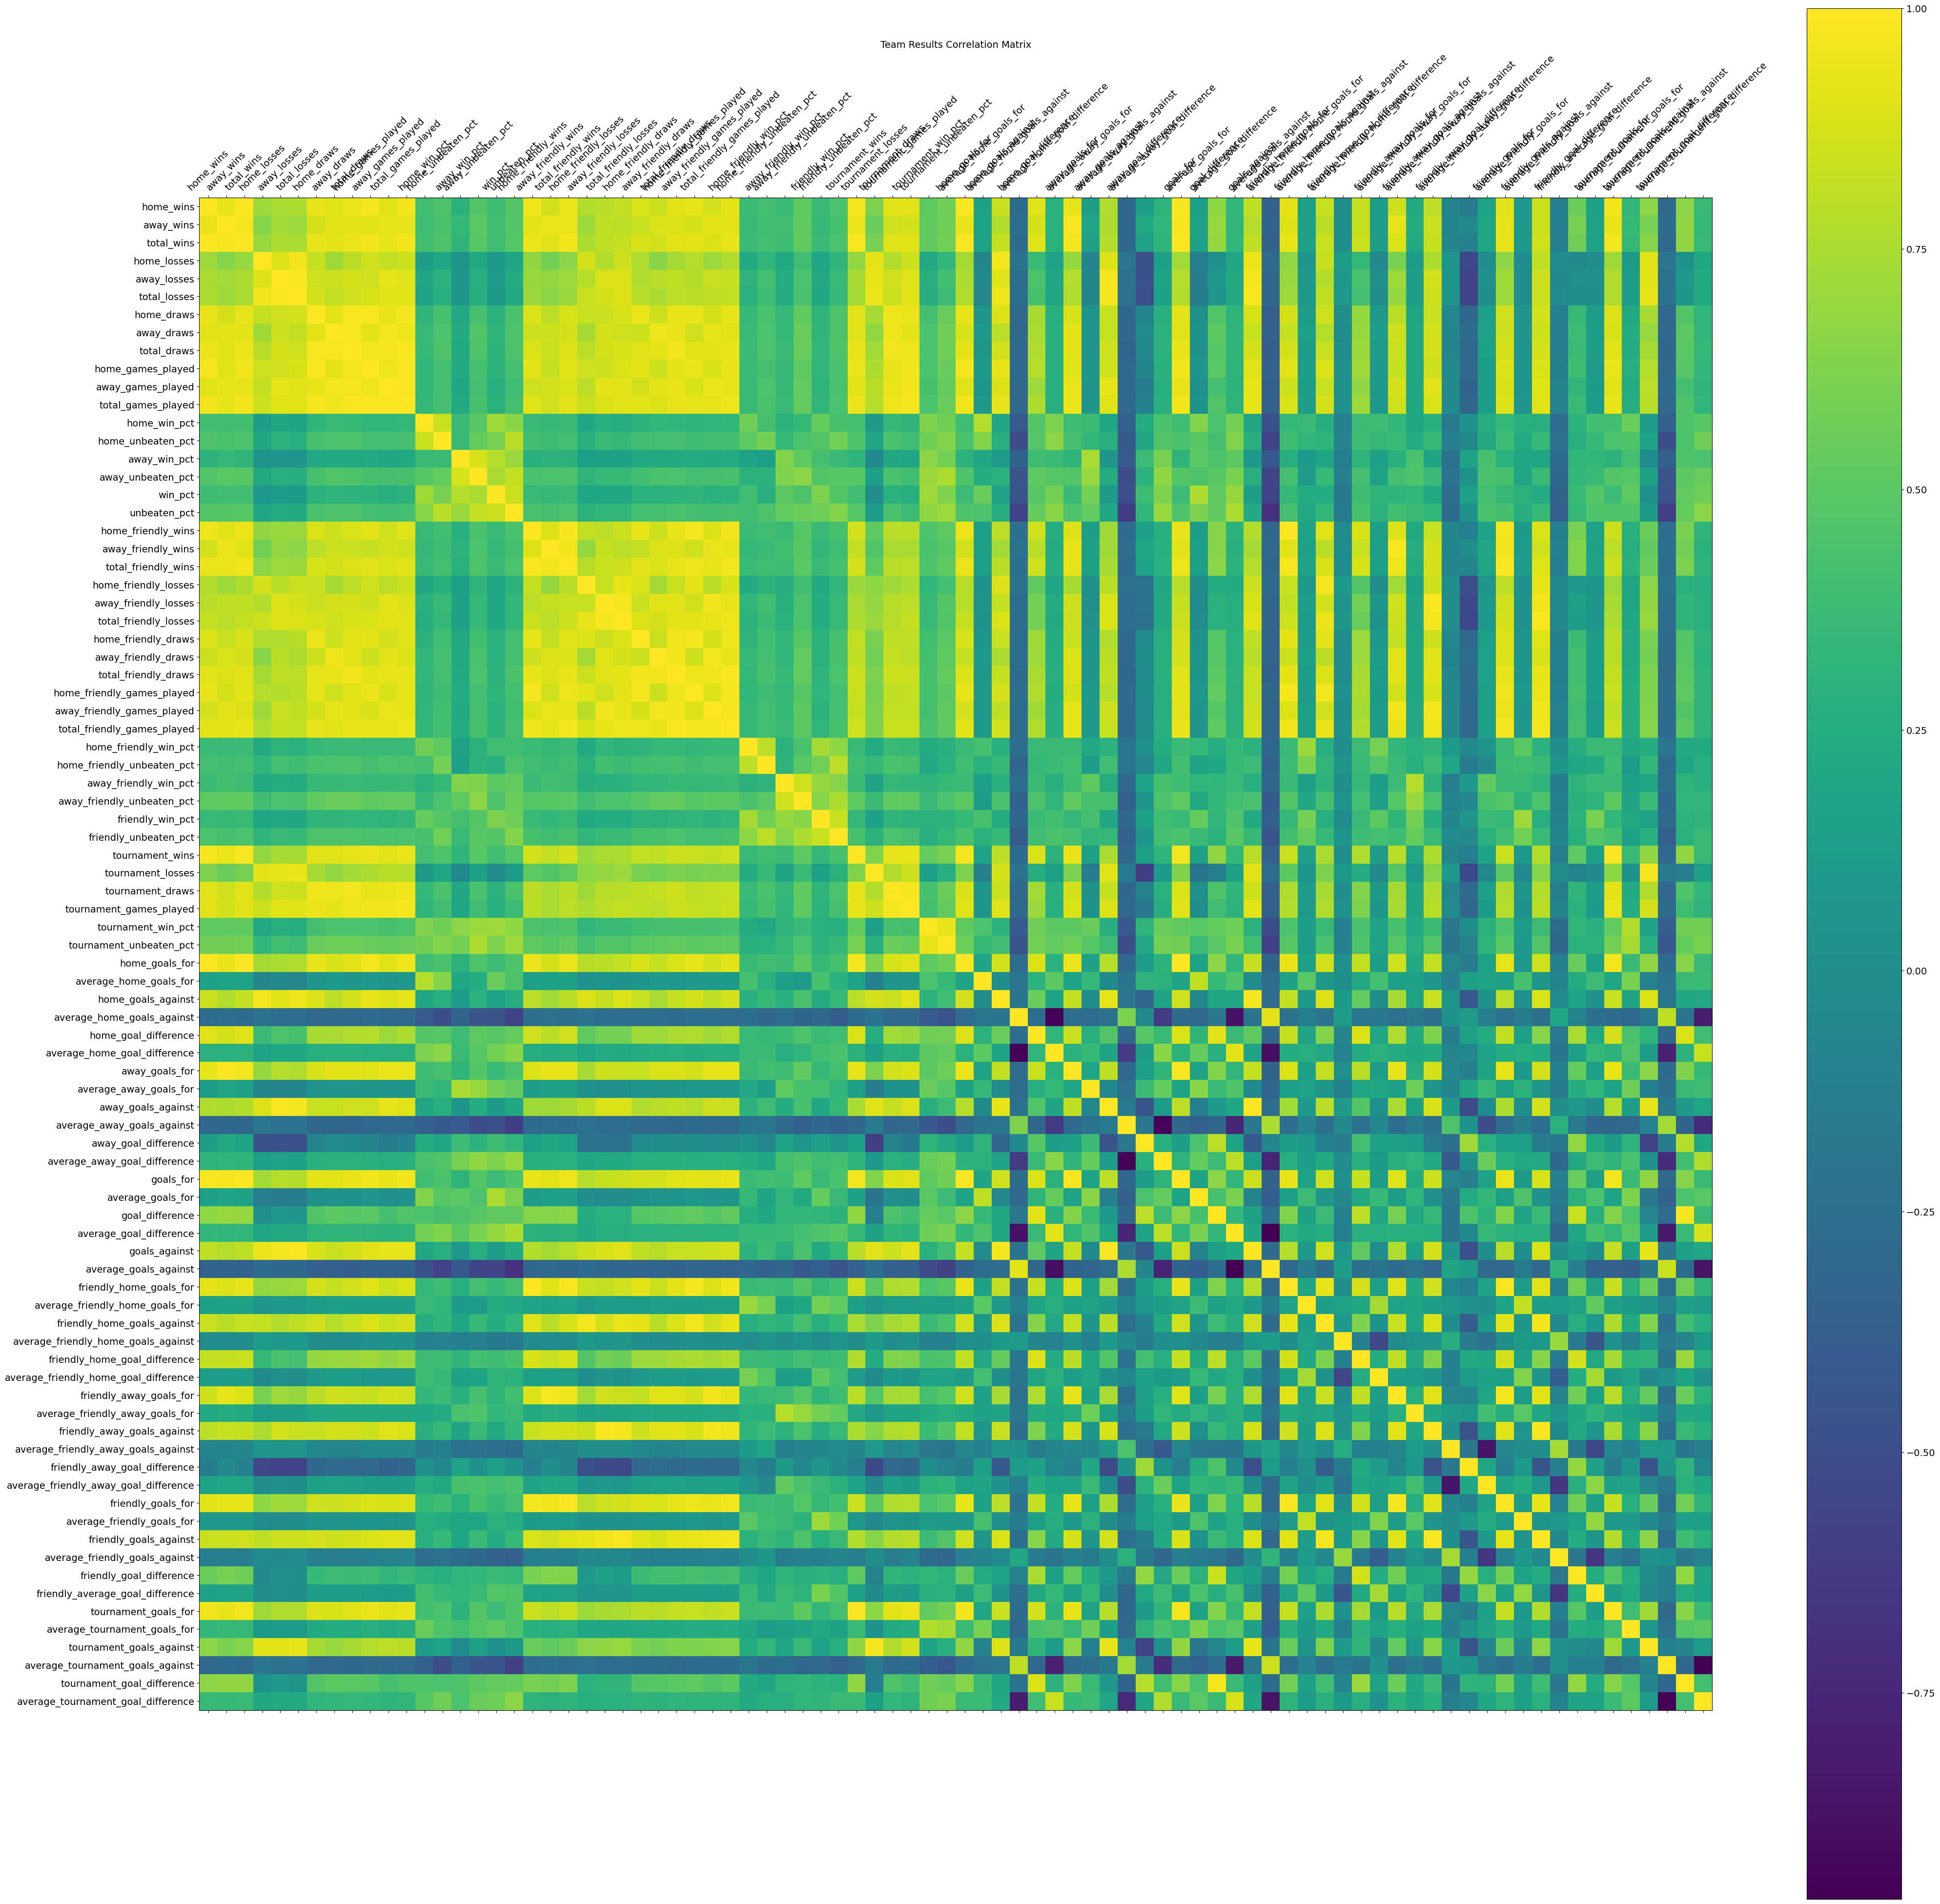

In [20]:
# Creating correlation matrix for df_results
f = plt.figure(figsize=(50,50)) # Size of figure
plt.matshow(df_team_results_numericals.corr(), fignum=f.number) # Type of plot
plt.xticks(range(df_team_results_numericals.shape[1]), df_team_results_numericals.columns, fontsize=14, rotation=45) # x-axis labels
plt.yticks(range(df_team_results_numericals.shape[1]), df_team_results_numericals.columns, fontsize=14) # y-axis labels
cb = plt.colorbar() # Color legend
cb.ax.tick_params(labelsize=14) # Setting font size
plt.title('Team Results Correlation Matrix', fontsize=14) # Creating title

In [22]:
df_team_results_numericals.columns

Index(['home_wins', 'away_wins', 'total_wins', 'home_losses', 'away_losses',
       'total_losses', 'home_draws', 'away_draws', 'total_draws',
       'home_games_played', 'away_games_played', 'total_games_played',
       'home_win_pct', 'home_unbeaten_pct', 'away_win_pct',
       'away_unbeaten_pct', 'win_pct', 'unbeaten_pct', 'home_friendly_wins',
       'away_friendly_wins', 'total_friendly_wins', 'home_friendly_losses',
       'away_friendly_losses', 'total_friendly_losses', 'home_friendly_draws',
       'away_friendly_draws', 'total_friendly_draws',
       'home_friendly_games_played', 'away_friendly_games_played',
       'total_friendly_games_played', 'home_friendly_win_pct',
       'home_friendly_unbeaten_pct', 'away_friendly_win_pct',
       'away_friendly_unbeaten_pct', 'friendly_win_pct',
       'friendly_unbeaten_pct', 'tournament_wins', 'tournament_losses',
       'tournament_draws', 'tournament_games_played', 'tournament_win_pct',
       'tournament_unbeaten_pct', 'home_goa

In [36]:
sub_2 = df_team_results_numericals[['total_wins','total_losses','total_draws','win_pct','unbeaten_pct','average_goals_for','average_goals_against','goal_difference']]

Text(0.5, 1.0, 'Team Results Correlation Matrix')

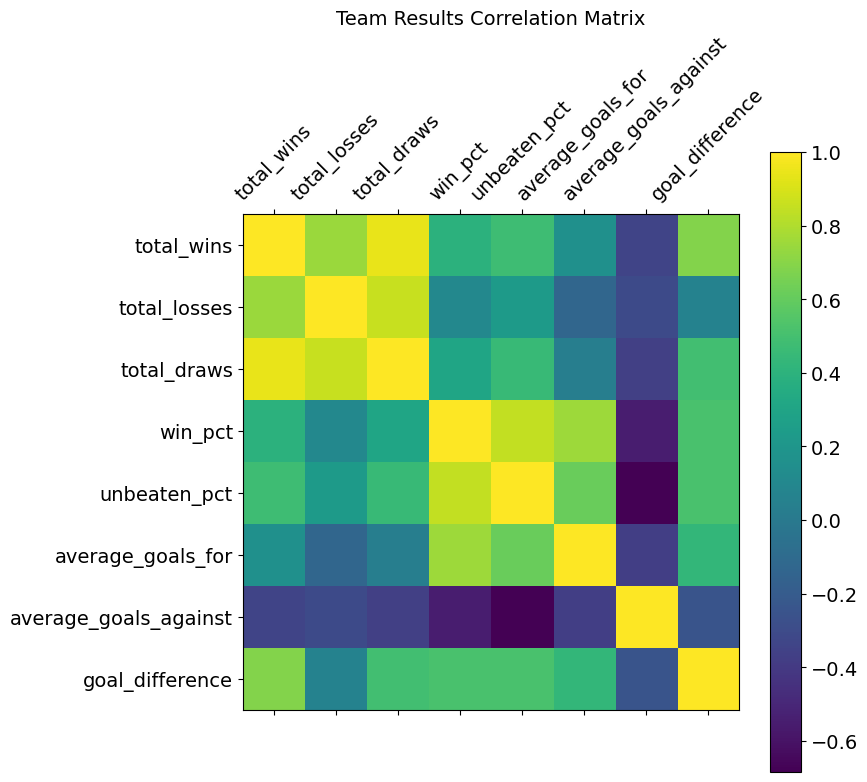

In [37]:
# Creating correlation matrix for df_results
f = plt.figure(figsize=(8,8)) # Size of figure
plt.matshow(sub_2.corr(), fignum=f.number) # Type of plot
plt.xticks(range(sub_2.shape[1]), sub_2.columns, fontsize=14, rotation=45) # x-axis labels
plt.yticks(range(sub_2.shape[1]), sub_2.columns, fontsize=14) # y-axis labels
cb = plt.colorbar() # Color legend
cb.ax.tick_params(labelsize=14) # Setting font size
plt.title('Team Results Correlation Matrix', fontsize=14) # Creating title

### 03. Scatterplot

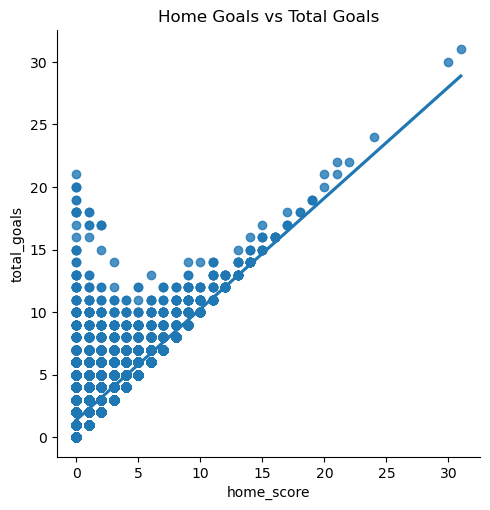

In [43]:
# Creating scatterplot between home_score and total_goals
sns.lmplot(x='home_score', y ='total_goals', data=df_results).set(title='Home Goals vs Total Goals')

In this scatterplot there is some positive correlation between the number of goals scored by the home team and the total number of goals scored in the match.

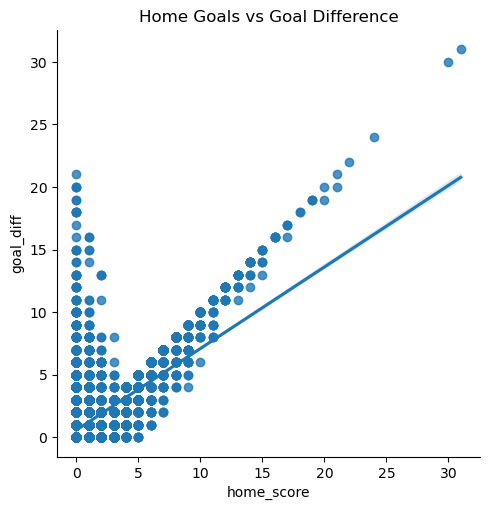

In [44]:
# Creating scatterplot between home_score and goal_diff
sns.lmplot(x='home_score', y='goal_diff', data=df_results).set(title='Home Goals vs Goal Difference')

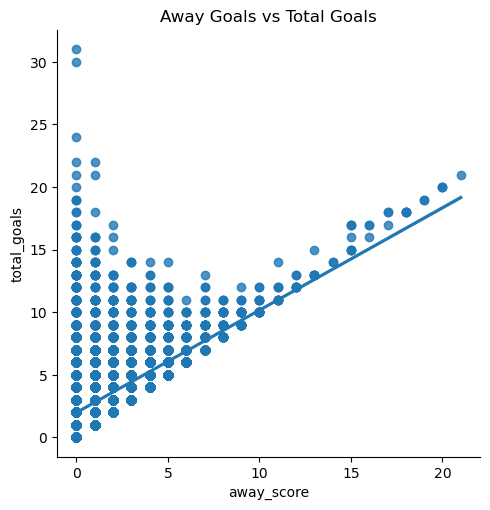

In [45]:
sns.lmplot(x='away_score', y='total_goals', data=df_results).set(title='Away Goals vs Total Goals')

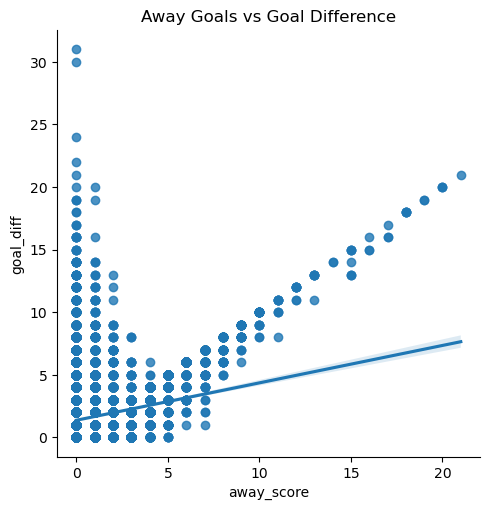

In [46]:
sns.lmplot(x='away_score', y='goal_diff', data=df_results).set(title='Away Goals vs Goal Difference')

In this scatterplot there is a positive correlation between the number of goals scored by the home team and the goal difference between the teams

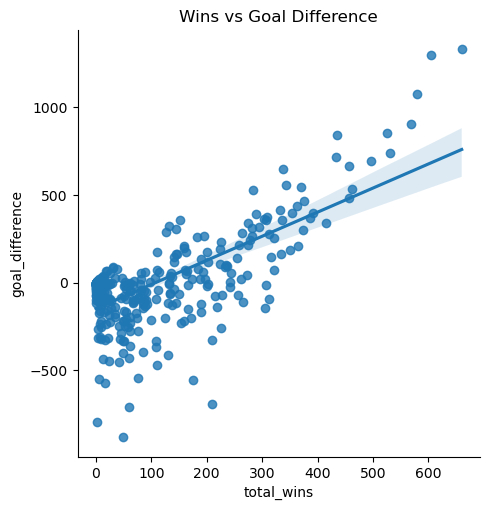

In [47]:
sns.lmplot(x='total_wins', y='goal_difference', data=df_team_results).set(title='Wins vs Goal Difference')

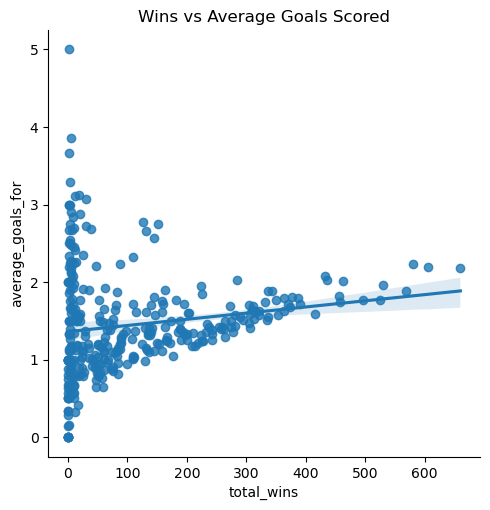

In [48]:
sns.lmplot(x='total_wins', y='average_goals_for', data=df_team_results).set(title='Wins vs Average Goals Scored')

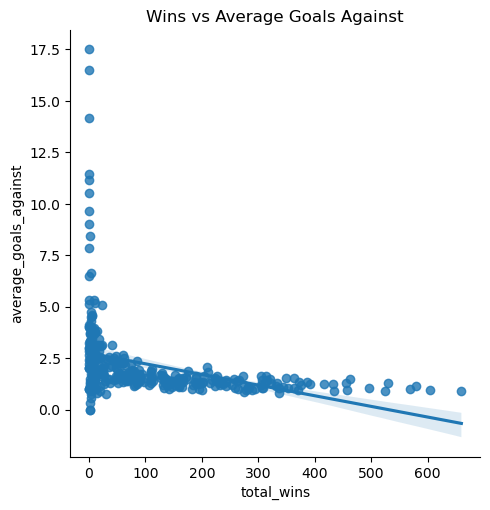

In [49]:
sns.lmplot(x='total_wins', y='average_goals_against', data=df_team_results).set(title='Wins vs Average Goals Against')

### 04. Pair Plots

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

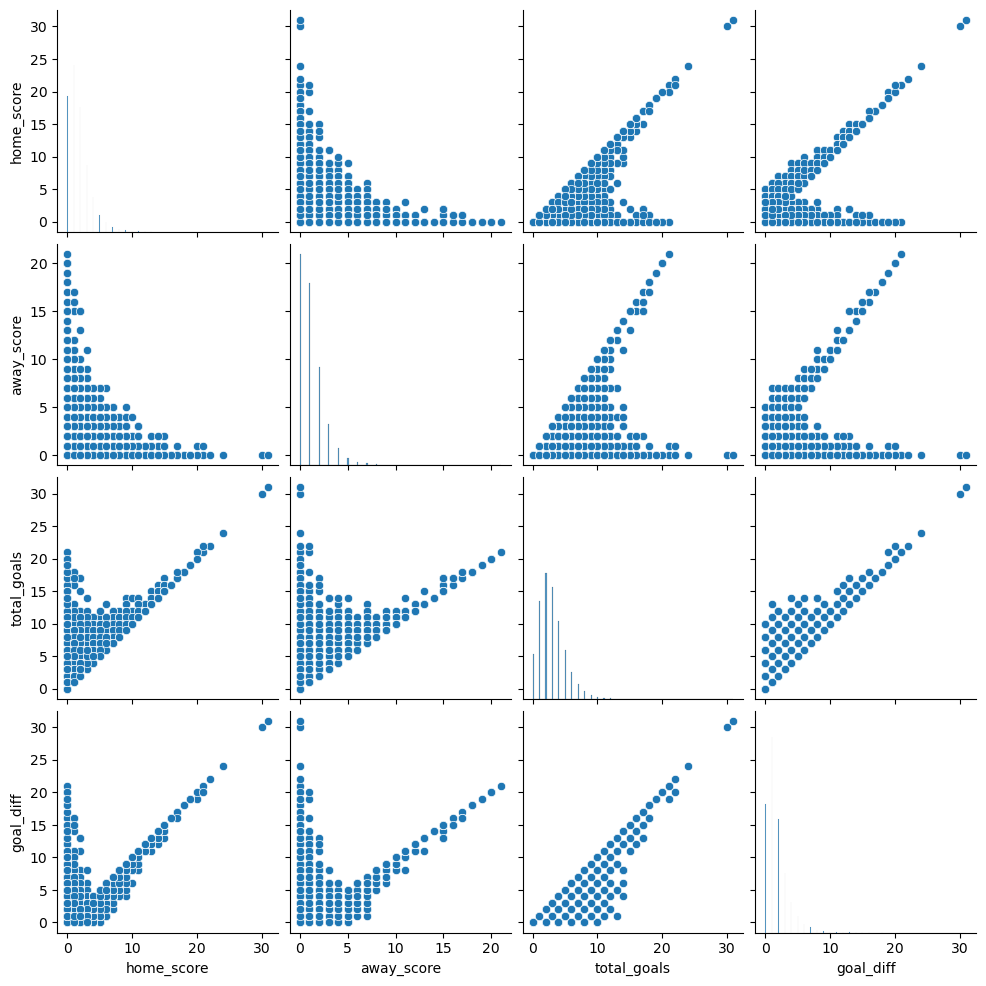

In [29]:
# Creating pair plots
g = sns.pairplot(sub)

I cannot see any significant insights from these plots. All plots show an expected positive correlation between each variable beause they all are measures of goals scored in a match.

### 05. Categorical Plots 

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_goals', ylabel='Count'>

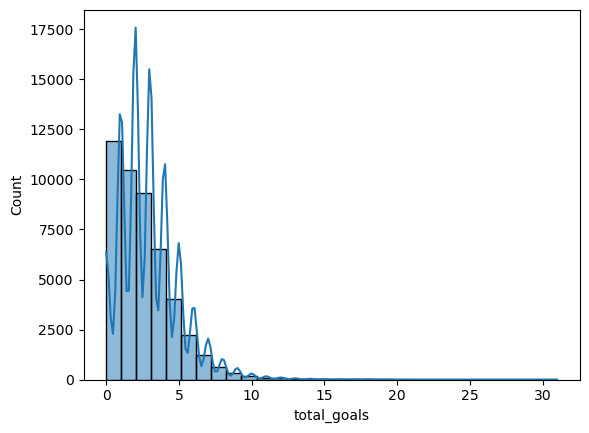

In [31]:
# Creating histogram of distribution of total_goals
sns.histplot(df_results['total_goals'], bins=30,kde=True)

In [32]:
# Creating scoring_type flag in df_results
df_results.loc[df_results['total_goals']<3, 'scoring_type'] = 'Low scoring'
df_results.loc[(df_results['total_goals']>=3) & (df_results['total_goals']<5), 'scoring_type'] = 'Medium scoring'
df_results.loc[df_results['total_goals']>=5, 'scoring_type'] = 'High scoring'

In [33]:
# Checking values of scoring_type
df_results['scoring_type'].value_counts(dropna=False)

scoring_type
Low scoring       22364
Medium scoring    15809
High scoring       8902
Name: count, dtype: int64

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


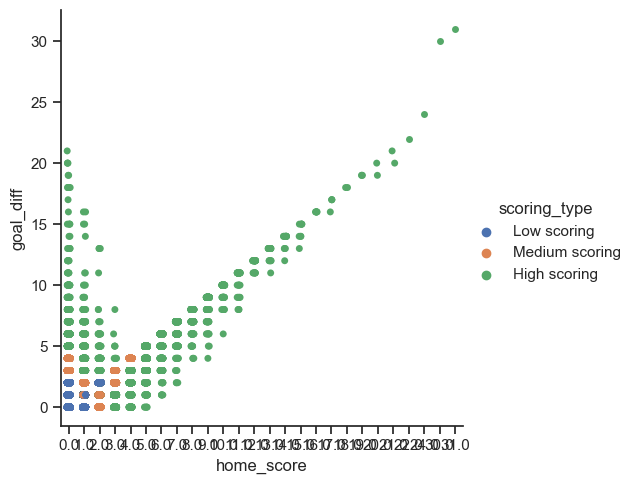

In [34]:
# Creating categorical plot using the scoring type categories above
sns.set(style='ticks')
g = sns.catplot(x='home_score', y='goal_diff', hue='scoring_type', data=df_results)

C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\widne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


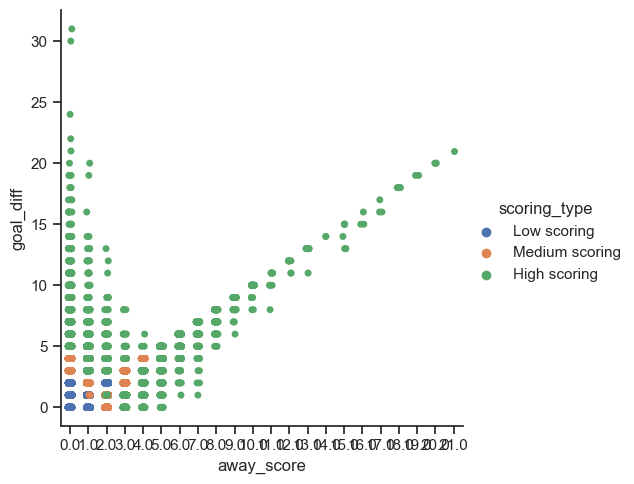

In [35]:
g = sns.catplot(x='away_score', y='goal_diff', hue='scoring_type', data=df_results)

It seems that the home team has had more success in scoring goals in high scoring games than away teams.

### 06. Hypothesis

From the questions I posted in exercise 1, there does not seem to be a clear answer to them. One way to help create a more clear relationship, I would like to split the results by decades and see if the relationships of the variables tested in this exercise change at all throughout those decades.

In [36]:
# Saving updated df_results
df_results.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'results_wrangled.pkl'))